$\Large\textbf{Lab 2. Exercise 1. }$



Recall that we implemented the gradient descent algorithm to solve $\min_{\mathbf{x} \in {\mathbb{R}}^n} f(\mathbf{x})$. The main ingredients in the gradient descent iterations are the descent direction $\mathbf{p}^k$ which is set to $-\nabla f(\mathbf{x}^k)$, and the step length $\eta^k$ which is found by solving an optimization problem (or sometimes taken as a constant value over all iterations). We used the following procedure in the previous lab:

\begin{align}
& \textbf{Input:} \text{ Starting point $x^0$, Stopping tolerance $\tau$}  \\
& \textbf{Initialize } k=0 \\ 
& \mathbf{p}^k =-\nabla f(\mathbf{x}^k) \\ 
&\textbf{While } \| \mathbf{p}^k \|_2 > \tau \text{ do:}  \\   
&\quad \quad \eta^k = \arg\min_{\eta\geq 0} f(\mathbf{x}^k + \eta  \mathbf{p}^k) = \arg\min_{\eta\geq 0} f(\mathbf{x}^k - \eta  \nabla f(\mathbf{x}^k)) \\
&\quad \quad \mathbf{x}^{k+1} = \mathbf{x}^k + \eta^k \mathbf{p}^k = \mathbf{x}^k - \eta^k \nabla f (\mathbf{x}^k)  \\ 
&\quad \quad k = {k+1} \\ 
&\textbf{End While} \\
&\textbf{Output: } \mathbf{x}^k
\end{align}

We saw that for particular cases of quadratic functions, a closed form analytical solution for the minimizer of the optimization problem $\min_{\eta \geq 0} f({\mathbf{x}}^k + \eta {\mathbf{p}}^k)$ exists. However finding a closed form expression as a solution to this optimization problem to find a suitable step length might not always be possible. To tackle general situations, we will try to devise a different procedure in this lab. 

To find the step length, we will use the following property: 
Suppose a non-zero $\mathbf{p} \in {\mathbb{R}}^n$ is a descent direction at point $\mathbf{x}$, and let $\gamma \in (0,1)$. Then there exists $\varepsilon >0$ such that  
\begin{align}
f(\mathbf{x}+\alpha \mathbf{p}) \leq f(\mathbf{x}) + \gamma \alpha \nabla f(\mathbf{x})^\top \mathbf{p}, \ \forall \alpha \in (0,\varepsilon].  
\end{align}

The step length $\eta^k$ can be found using a backtracking procedure illustrated below to find appropriate value of $\varepsilon$.  




\begin{align}
& \textbf{Input:}  \text{ $\mathbf{x}^k$, $\mathbf{p}^k$, $\alpha^0$, $\rho \in (0,1)$, $\gamma \in (0,1)$ }  \\
& \textbf{Initialize } \alpha=\alpha^0 \\ 
&\textbf{While } f(\mathbf{x}^k + \alpha \mathbf{p}^k)   > f(\mathbf{x}^k) + \gamma \alpha \nabla f(\mathbf{x}^k)^\top \mathbf{p}^k \text{ do:}  \\   
&\quad \quad \alpha = \rho \alpha  \\
&\textbf{End While} \\
&\textbf{Output: } \alpha
\end{align}

In this exercise, we will check if finding the steplength using the backtracking procedure is advantageous for some quadratic functions. In this sample code we consider $f(\mathbf{x})=f(x_1,x_2) = (x_1-8)^2 + (x_2 + 12)^2$.

In [1]:
#numpy package will be used for most of our lab exercises. Please have a look at Please have a look at https://numpy.org/doc/stable/ for numpy documentation
#we will first import the numpy package and name it as np
import numpy as np 
import matplotlib.pyplot as plt
#Henceforth, we can lazily use np to denote the much longer numpy !! 

In [2]:
#Now we will define a function which will compute and return the function value 
def evalf(x):  
  #Input: x is a numpy array of size 2 
  assert type(x) is np.ndarray and len(x) == 2 #do not allow arbitrary arguments 
  #after checking if the argument is valid, we can compute the objective function value
  #compute the function value and return it 
  return (x[1]+12)**2 + (-8+x[0])**2


In [3]:
#Now we will define a function which will compute and return the gradient value as a numpy array 
def evalg(x):  
  #Input: x is a numpy array of size 2 
  assert type(x) is np.ndarray and len(x) == 2 #do not allow arbitrary arguments 
  #after checking if the argument is valid, we can compute the gradient value
  #compute the gradient value and return it 
  return np.array([2*(x[0]-8), 2*(x[1]+12)])

In [4]:
#Complete the module to compute the steplength by using the closed-form expression
def compute_steplength_exact(gr, A): #add appropriate arguments to the function 
  assert type(gr) is np.ndarray and len(gr) == 2 
  assert type(A) is np.ndarray and A.shape[0] == 2 and  A.shape[1] == 2 #allow only a 2x2 array
   
  #Complete the code to compute step length
  step_length = np.matmul(gr,np.transpose(gr))/(2*np.matmul(gr,np.matmul(A,gr.T)))
  
  return step_length

In [5]:
#Complete the module to compute the steplength by using the backtracking line search
def compute_steplength_backtracking(x, gradf, alpha_start, rho, gamma): #add appropriate arguments to the function 
  assert type(x) is np.ndarray and len(gradf) == 2 
  assert type(gradf) is np.ndarray and len(gradf) == 2 

  alpha = alpha_start
  while evalf(x - alpha*gradf) > evalf(x) - gamma*alpha*np.matmul(gradf,gradf.T):
    alpha *= rho
    
  #implement the backtracking line search
  

  #print('final step length:',alpha)
  return alpha

In [6]:
#we define the types of line search methods that we have implemented
EXACT_LINE_SEARCH = 1
BACKTRACKING_LINE_SEARCH = 2
CONSTANT_STEP_LENGTH = 3

In [7]:
def find_minimizer(start_x, tol, line_search_type, *args):
  #Input: start_x is a numpy array of size 2, tol denotes the tolerance and is a positive float value
  assert type(start_x) is np.ndarray and len(start_x) == 2 #do not allow arbitrary arguments 
  assert type(tol) is float and tol>=0 
  # construct a suitable A matrix for the quadratic function 
  A = np.array([[1, 0],[0,1]])
  x = start_x
  g_x = evalg(x)

  #initialization for backtracking line search
  if(line_search_type == BACKTRACKING_LINE_SEARCH):
    alpha_start = args[0]
    rho = args[1]
    gamma = args[2]
    print('Params for Backtracking LS: alpha start:', alpha_start, 'rho:', rho,' gamma:', gamma)

  k = 0
  print('iter:',k, ' x:', x, ' f(x):', evalf(x), ' grad at x:', g_x, ' gradient norm:', np.linalg.norm(g_x))

  while (np.linalg.norm(g_x) > tol): #continue as long as the norm of gradient is not close to zero upto a tolerance tol
  
    if line_search_type == EXACT_LINE_SEARCH:
      step_length = compute_steplength_exact(x, A) #call the new function you wrote to compute the steplength
      
      #raise ValueError('EXACT LINE SEARCH NOT YET IMPLEMENTED')
    elif line_search_type == BACKTRACKING_LINE_SEARCH:
      step_length = compute_steplength_backtracking(x,g_x, alpha_start,rho, gamma) #call the new function you wrote to compute the steplength
      #raise ValueError('BACKTRACKING LINE SEARCH NOT YET IMPLEMENTED')
    elif line_search_type == CONSTANT_STEP_LENGTH: #do a gradient descent with constant step length
      step_length = 0.1
    else:  
      raise ValueError('Line search type unknown. Please check!')
    
    #implement the gradient descent steps here   
    x = np.subtract(x, np.multiply(step_length,g_x)) #update x = x - step_length*g_x
    k += 1 #increment iteration
    g_x = evalg(x) #compute gradient at new point

    #print('iter:',k, ' x:', x, ' f(x):', evalf(x), ' grad at x:', g_x, ' gradient norm:', np.linalg.norm(g_x))
    
  return x,k 


In [8]:

my_start_x = np.array([1,1])
my_tol= 1e-5


x_opt,it = find_minimizer(my_start_x, my_tol, CONSTANT_STEP_LENGTH)
print(x_opt)

#check what happens when you call find_minimzer using backtracking line search



iter: 0  x: [1 1]  f(x): 218  grad at x: [-14  26]  gradient norm: 29.5296461204668
[  7.99999775 -11.99999582]


In [9]:
x_opt_bls,it = find_minimizer(my_start_x, my_tol, BACKTRACKING_LINE_SEARCH, 1, 0.5,0.5)
print(x_opt_bls)

Params for Backtracking LS: alpha start: 1 rho: 0.5  gamma: 0.5
iter: 0  x: [1 1]  f(x): 218  grad at x: [-14  26]  gradient norm: 29.5296461204668
[  8. -12.]


In [10]:

x_opt_ex,it = find_minimizer(my_start_x, my_tol, EXACT_LINE_SEARCH)
print(x_opt_ex)

iter: 0  x: [1 1]  f(x): 218  grad at x: [-14  26]  gradient norm: 29.5296461204668
[  8. -12.]


In [11]:
it

1

### 3)

In [12]:
print(f'For exact line search, minimizer is {x_opt_ex} and min function value is {evalf(x_opt_ex)}')
print('For backtracking line search, minimizer is {} and min function value is {}'.format(x_opt_bls,evalf(x_opt_bls)))
print('For constant step length, minimizer is {} and min function value is {}'.format(x_opt,evalf(x_opt)))
print('Actual minimizer is [8,-12] and min function value is 0')

For exact line search, minimizer is [  8. -12.] and min function value is 0.0
For backtracking line search, minimizer is [  8. -12.] and min function value is 0.0
For constant step length, minimizer is [  7.99999775 -11.99999582] and min function value is 2.2517218946096954e-11
Actual minimizer is [8,-12] and min function value is 0


In [13]:
x2 = np.array([25,25])
tol2 = 1e-12

In [14]:
x2_ex,it = find_minimizer(x2, tol2, EXACT_LINE_SEARCH)

iter: 0  x: [25 25]  f(x): 1658  grad at x: [34 74]  gradient norm: 81.43709228600933


In [15]:
x2_bls,it2 = find_minimizer(x2,tol2, BACKTRACKING_LINE_SEARCH,1,0.5,0.5)

Params for Backtracking LS: alpha start: 1 rho: 0.5  gamma: 0.5
iter: 0  x: [25 25]  f(x): 1658  grad at x: [34 74]  gradient norm: 81.43709228600933


## 4)

In [57]:
print(f'Number of iterations by exact line search is {it} and by backtractracking line search is {it2}. It turned out to be same for this combination of alpha,rho,gamma')

Number of iterations by exact line search is 1 and by backtractracking line search is 1. It turned out to be same for this combination of alpha,rho,gamma


In [17]:
alph = [1,0.9, 0.75, 0.6, 0.5, 0.4, 0.25, 0.1, 0.01]
iter1 = []
f_alp = []
x_alp = []
for j in alph:
  x,k = find_minimizer(x2,1e-10,BACKTRACKING_LINE_SEARCH,j,0.5,0.5)
  iter1.append(k)
  x_alp.append(x)
  f_alp.append(evalf(x))




Params for Backtracking LS: alpha start: 1 rho: 0.5  gamma: 0.5
iter: 0  x: [25 25]  f(x): 1658  grad at x: [34 74]  gradient norm: 81.43709228600933
Params for Backtracking LS: alpha start: 0.9 rho: 0.5  gamma: 0.5
iter: 0  x: [25 25]  f(x): 1658  grad at x: [34 74]  gradient norm: 81.43709228600933
Params for Backtracking LS: alpha start: 0.75 rho: 0.5  gamma: 0.5
iter: 0  x: [25 25]  f(x): 1658  grad at x: [34 74]  gradient norm: 81.43709228600933
Params for Backtracking LS: alpha start: 0.6 rho: 0.5  gamma: 0.5
iter: 0  x: [25 25]  f(x): 1658  grad at x: [34 74]  gradient norm: 81.43709228600933
Params for Backtracking LS: alpha start: 0.5 rho: 0.5  gamma: 0.5
iter: 0  x: [25 25]  f(x): 1658  grad at x: [34 74]  gradient norm: 81.43709228600933
Params for Backtracking LS: alpha start: 0.4 rho: 0.5  gamma: 0.5
iter: 0  x: [25 25]  f(x): 1658  grad at x: [34 74]  gradient norm: 81.43709228600933
Params for Backtracking LS: alpha start: 0.25 rho: 0.5  gamma: 0.5
iter: 0  x: [25 25]  f

## 5)

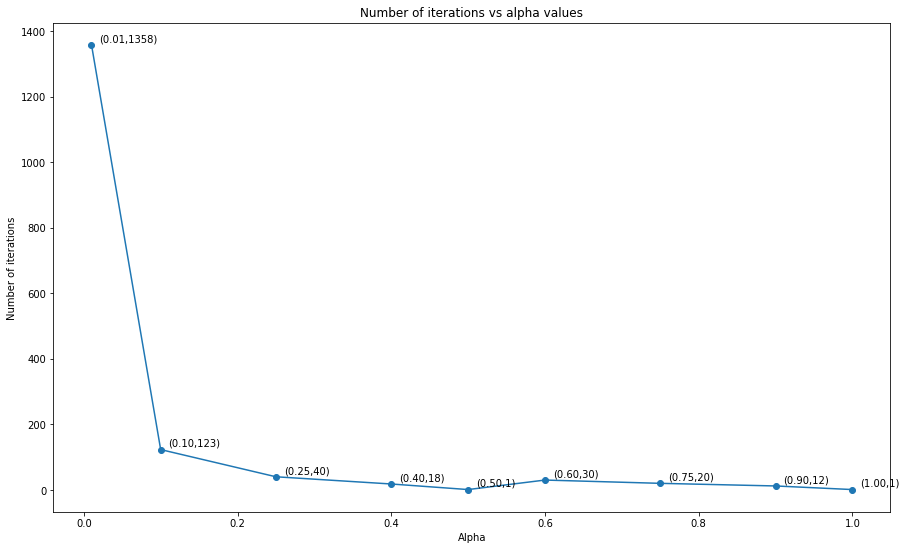

In [56]:
plt.figure(figsize=(15,9))
plt.plot(alph, iter1, marker = 'o')
for i in range(9):
  p = np.array([alph[i],iter1[i]])
  plt.annotate('({:.2f},{:n})'.format(p[0],p[1]),xy = p,xytext = p+np.array([0.01,10]))
plt.title('Number of iterations vs alpha values')
plt.xlabel('Alpha')
plt.ylabel('Number of iterations')
plt.show()

We see that number of iterations is very large for alpha = 0.01, and comparatively large for alpha =0.1 . Otherwise the number of iterations seem to be in the range 1 to 40, and not monotonic. This is unlike the behaviour in constant step length. This is due to the fact that for a given alpha, step length in each iteration is not same,and hence takes big steps in some iterations and smaller steps in some others. The number of iterations are 1 in the case where the computed step length happens to be the exact step length, but otherwise, number of iterations are much more than for exact step length 

In [19]:
print(f_alp,'\n',x_alp)

[0.0, 1.6579714975258972e-21, 1.3714654556129199e-21, 2.2038291998576117e-21, 0.0, 1.1393259623274523e-22, 1.3714654556129199e-21, 2.3972320602008796e-21, 2.4523367712209537e-21] 
 [array([  8., -12.]), array([  8., -12.]), array([  8., -12.]), array([  8., -12.]), array([  8., -12.]), array([  8., -12.]), array([  8., -12.]), array([  8., -12.]), array([  8., -12.])]


We see that the errors in the minimum function value are almost all of the order $10^{-21}$, and we got exact solutions for alpha = 1 , 0.5, since exact step length also happens to be 0.5, and for alpha=1, we get backtracking step length as 0.5. Final minimizers are all (8,-12).\
Except for 2 cases, number of iterations are more than more exact step length.

In [20]:
rhov = [0.9, 0.75, 0.6, 0.5, 0.4, 0.25, 0.1, 0.01]
iter2 = []
f_rho = []
x_rho = []
for j in rhov:
  x,k = find_minimizer(x2,1e-10,BACKTRACKING_LINE_SEARCH,1,j,0.5)
  iter2.append(k)
  x_rho.append(x)
  f_rho.append(evalf(x))


Params for Backtracking LS: alpha start: 1 rho: 0.9  gamma: 0.5
iter: 0  x: [25 25]  f(x): 1658  grad at x: [34 74]  gradient norm: 81.43709228600933
Params for Backtracking LS: alpha start: 1 rho: 0.75  gamma: 0.5
iter: 0  x: [25 25]  f(x): 1658  grad at x: [34 74]  gradient norm: 81.43709228600933
Params for Backtracking LS: alpha start: 1 rho: 0.6  gamma: 0.5
iter: 0  x: [25 25]  f(x): 1658  grad at x: [34 74]  gradient norm: 81.43709228600933
Params for Backtracking LS: alpha start: 1 rho: 0.5  gamma: 0.5
iter: 0  x: [25 25]  f(x): 1658  grad at x: [34 74]  gradient norm: 81.43709228600933
Params for Backtracking LS: alpha start: 1 rho: 0.4  gamma: 0.5
iter: 0  x: [25 25]  f(x): 1658  grad at x: [34 74]  gradient norm: 81.43709228600933
Params for Backtracking LS: alpha start: 1 rho: 0.25  gamma: 0.5
iter: 0  x: [25 25]  f(x): 1658  grad at x: [34 74]  gradient norm: 81.43709228600933
Params for Backtracking LS: alpha start: 1 rho: 0.1  gamma: 0.5
iter: 0  x: [25 25]  f(x): 1658  g

### 6)

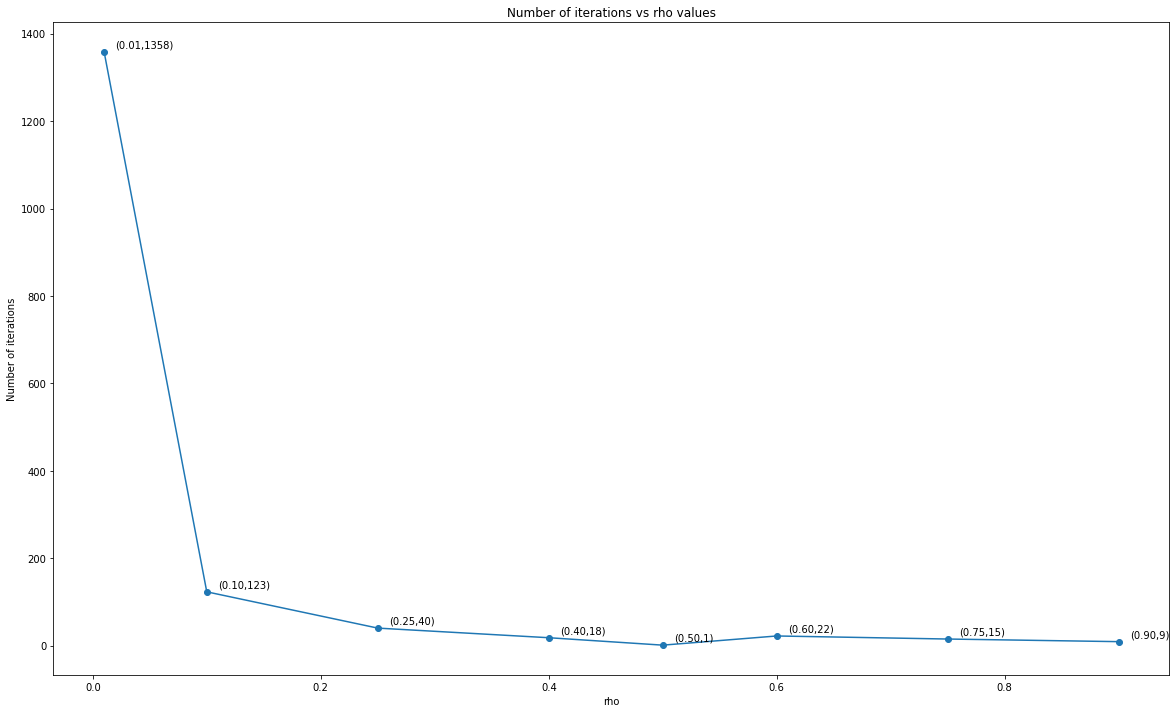

In [55]:
plt.figure(figsize=(20,12))
plt.plot(rhov, iter2, marker = 'o')
plt.title('Number of iterations vs rho values')
for i in range(8):
  p = np.array([rhov[i],iter2[i]])
  plt.annotate('({:.2f},{:n})'.format(p[0],p[1]),xy = p,xytext = p+np.array([0.01,10]))
plt.xlabel('rho')
plt.ylabel('Number of iterations')
plt.show()

We see that number of iterations is very large for rho = 0.01, and comparatively large for rho =0.1 . Otherwise the number of iterations seem to be in the range 1 to 40, and not monotonic wrt rho. This is due to the fact that for a given alpha, step length in each iteration is not same,and hence takes big steps in some iterations and smaller steps in some others. The number of iterations are 1 in the case where the computed step length happens to be the exact step length (for rho = 0.5).

In [22]:
print(f_rho,'\n',x_rho)

[4.960536411900771e-22, 1.0819468296335504e-21, 7.844395544174143e-22, 0.0, 1.1393259623274523e-22, 1.3714654556129199e-21, 2.3972320602008796e-21, 2.4523367712209537e-21] 
 [array([  8., -12.]), array([  8., -12.]), array([  8., -12.]), array([  8., -12.]), array([  8., -12.]), array([  8., -12.]), array([  8., -12.]), array([  8., -12.])]


We see that the errors in the minimum function value are almost all of the order $10^{-21} \text{ or }  10^{22}$, and we got exact solutions for rho =  0.5, since exact step length also happens to be 0.5, and for alpha=1, we get backtracking step length as 0.5. Final minimizers are all (8,-12).\
Except for 1 case, number of iterations are more than for exact step length.